In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [5]:
pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [6]:
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [7]:
df['target'] = diabetes.target

In [8]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [9]:
x = df.drop(columns=['target'])

In [10]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [11]:
y = df['target']

In [12]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [13]:
train_test_split(x,y , test_size= .2)

[          age       sex       bmi        bp        s1        s2        s3  \
 57  -0.027310 -0.044642 -0.063330 -0.050427 -0.089630 -0.104340  0.052322   
 168  0.001751  0.050680  0.059541 -0.002228  0.061725  0.063195 -0.058127   
 64   0.067136  0.050680 -0.025607 -0.040099 -0.063487 -0.059873 -0.002903   
 231  0.009016 -0.044642 -0.030996  0.021872  0.008063  0.008707  0.004460   
 46  -0.056370 -0.044642 -0.011595 -0.033213 -0.046975 -0.047660  0.004460   
 ..        ...       ...       ...       ...       ...       ...       ...   
 105  0.023546  0.050680 -0.032073 -0.040099 -0.031840 -0.021669 -0.013948   
 159 -0.005515 -0.044642  0.043373  0.087287  0.013567  0.007141 -0.013948   
 262 -0.016412  0.050680  0.127443  0.097615  0.016318  0.017475 -0.021311   
 79  -0.103593 -0.044642 -0.037463 -0.026328  0.002559  0.019980  0.011824   
 325 -0.001882 -0.044642  0.054152 -0.066506  0.072732  0.056619 -0.043401   
 
            s4        s5        s6  
 57  -0.076395 -0.056153 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size= .2)

In [15]:
x_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
316,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074966,0.040343
338,-0.063635,-0.044642,-0.033151,-0.033213,0.001183,0.024051,-0.024993,-0.002592,-0.022517,-0.059067
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
420,0.023546,-0.044642,-0.036385,0.000079,0.001183,0.034698,-0.043401,0.034309,-0.033246,0.061054
397,0.052606,-0.044642,-0.004050,-0.030907,-0.046975,-0.058307,-0.013948,-0.025840,0.036060,0.023775
...,...,...,...,...,...,...,...,...,...,...
223,-0.099961,-0.044642,-0.023451,-0.064199,-0.057983,-0.060186,0.011824,-0.039493,-0.018114,-0.050783
402,0.110727,0.050680,-0.033151,-0.022885,-0.004321,0.020293,-0.061809,0.071210,0.015568,0.044485
304,0.041708,0.050680,-0.038540,0.052858,0.076860,0.116430,-0.039719,0.071210,-0.022517,-0.013504
204,0.110727,0.050680,0.006728,0.028758,-0.027712,-0.007264,-0.047082,0.034309,0.002004,0.077622


In [16]:
x_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
288,0.070769,0.050680,-0.016984,0.021872,0.043837,0.056305,0.037595,-0.002592,-0.070209,-0.017646
28,0.052606,-0.044642,-0.021295,-0.074527,-0.040096,-0.037639,-0.006584,-0.039493,-0.000612,-0.054925
163,0.016281,0.050680,0.072474,0.076958,-0.008449,0.005575,-0.006584,-0.002592,-0.023647,0.061054
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
371,0.052606,0.050680,-0.009439,0.049415,0.050717,-0.019163,-0.013948,0.034309,0.119340,-0.017646
...,...,...,...,...,...,...,...,...,...,...
395,-0.060003,-0.044642,0.001339,-0.029770,-0.007073,-0.021669,0.011824,-0.002592,0.031812,-0.054925
200,0.056239,-0.044642,-0.057941,-0.007977,0.052093,0.049103,0.056003,-0.021412,-0.028323,0.044485
141,-0.027310,-0.044642,0.047685,-0.046985,0.034206,0.057245,-0.080217,0.130252,0.045067,0.131470
280,0.009016,0.050680,0.018584,0.039087,0.017694,0.010586,0.019187,-0.002592,0.016307,-0.017646


In [17]:
y_test

288     80.0
28     131.0
163    131.0
2      141.0
371    197.0
       ...  
395    258.0
200    158.0
141    317.0
280    265.0
376    121.0
Name: target, Length: 89, dtype: float64

In [18]:
y_train

316    220.0
338    214.0
6      138.0
420    146.0
397    198.0
       ...  
223    150.0
402    168.0
304    253.0
204    277.0
314    147.0
Name: target, Length: 353, dtype: float64

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [20]:
ridge_model = Ridge()
lasso_model = Lasso()

In [21]:
ridge_model.fit(x_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [22]:
lasso_model.fit(x_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [23]:
ridge_model.predict(x_test_scaled)

array([ 80.86095823, 130.00554398, 195.0408398 , 177.59336746,
       197.47448926,  71.10302952,  59.85131529, 163.60695712,
       154.95976125, 173.25406907,  97.29709515, 171.68707111,
       156.2574436 ,  51.05948261, 152.15796866,  99.72238138,
       144.7955127 , 223.02988   ,  58.20555603, 223.18707938,
       201.77916902, 228.83081148, 237.28390757, 156.00400805,
       244.45730032,  72.05325902, 113.64249938,  80.72806636,
       168.42493116, 152.99327118, 110.86628156, 108.79478457,
        78.46966143, 118.85593387, 113.5312354 , 255.83059435,
       151.5355317 , 141.09633291, 244.14486754, 196.00315545,
       183.47325322, 167.68966494, 201.69218661,  54.81172198,
       240.89488519, 125.10313983,  55.50215515, 154.4458512 ,
       145.33216573, 131.76898114, 146.38270876, 181.76207912,
       189.58729794, 214.88921915, 247.38647878, 154.78590911,
       110.03904613, 200.69506976, 137.0955327 ,  76.0708946 ,
        23.49543986, 168.30933595, 117.32517822, 151.13

In [24]:
lasso_model.predict(x_test_scaled)

array([ 87.25366616, 130.93452186, 195.46033741, 178.03331711,
       204.38752652,  71.25159907,  66.18243747, 164.00488638,
       152.41281244, 176.07824769,  98.79494839, 170.22634231,
       155.42645339,  56.88674456, 150.32453625, 104.96446496,
       149.60739844, 220.38152826,  64.82685657, 219.66123917,
       195.44220201, 219.31054028, 233.93507278, 157.67697991,
       238.18244246,  74.92275964, 119.39672048,  90.19649287,
       164.94099457, 151.39517064, 107.83554022, 111.91956399,
        86.09086821, 118.38729788, 112.52846873, 258.07002959,
       148.57008408, 133.8471555 , 242.22087832, 190.22972626,
       183.34391877, 165.74663353, 199.59268809,  53.60538418,
       239.37136082, 123.83498977,  66.27473563, 149.44317255,
       144.9434069 , 133.41427187, 145.54014529, 183.59188804,
       187.20554367, 214.41365176, 246.87408985, 150.39715406,
       112.8770526 , 200.01989666, 138.10920499,  77.97697445,
        30.75126114, 166.3048655 , 121.8330376 , 148.52

In [25]:
mean_squared_error(y_test,ridge_model.predict(x_test_scaled))

3090.629337466631

In [26]:
mean_squared_error(y_test,lasso_model.predict(x_test_scaled))

3158.365807250123

In [27]:
r2_score(y_test,lasso_model.predict(x_test_scaled))

0.5020972080843202

In [28]:
r2_score(y_test,ridge_model.predict(x_test_scaled))

0.5127755713512645

In [ ]:
import pickle
with open ("diabaties.pkl",'wb') as file :
    pickle.dump((model,scaler,le),file)

In [29]:
# plynomial regression
data = pd.read_csv('D:\DATA ANALYTICS STUFF\Python\gen_ai_euron\Ice-cream-selling-data-csv_6UnYJ.csv')

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\KAMRA\AppData\Local\Temp\ipykernel_3684\2436652640.py:2: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('D:\DATA ANALYTICS STUFF\Python\gen_ai_euron\Ice-cream-selling-data-csv_6UnYJ.csv')


In [30]:
data


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


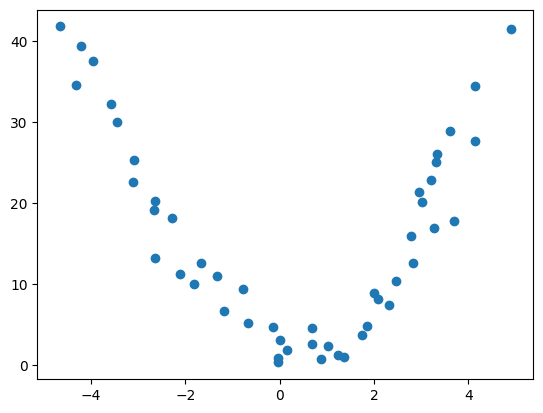

In [ ]:
plt.scatter(data['Temperature (°C)'],data['Ice Cream Sales (units)'])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
x = data['Temperature (°C)']
y = data['Ice Cream Sales (units)']

In [ ]:
x = data[['Temperature (°C)']]
y = data['Ice Cream Sales (units)']
ploy_model = make_pipeline(PolynomialFeatures(degree=3) , LinearRegression())
ploy_model.fit(x,y)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [ ]:
y_pred = ploy_model.predict(x)

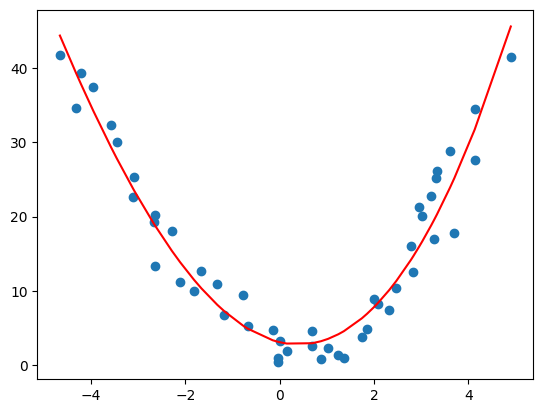

In [ ]:
plt.scatter(data['Temperature (°C)'],data['Ice Cream Sales (units)'])
plt.plot(x,y_pred,color = 'red')